# import modules

In [2]:
import sys

sys.path.insert(0, "../")
from modules.contours_ver2 import *

# import data

In [3]:
with open("../data/indiv_contour_mcz20_2024-07-14_06-02-21.pkl", "rb") as f:
    data_mcz20 = pickle.load(f)

data_mcz20["stats"] = get_indiv_contour_stats(
    data_mcz20["omega_matrix"],
    data_mcz20["theta_matrix"],
    data_mcz20["epsilon_matrix"],
    data_mcz20["gammaP_min_matrix"],
    thres_factor=1.01,
    thres_diff=0,
)

data_mcz20

{'omega_matrix': array([[0. , 0.1, 0.2, ..., 3.8, 3.9, 4. ],
        [0. , 0.1, 0.2, ..., 3.8, 3.9, 4. ],
        [0. , 0.1, 0.2, ..., 3.8, 3.9, 4. ],
        ...,
        [0. , 0.1, 0.2, ..., 3.8, 3.9, 4. ],
        [0. , 0.1, 0.2, ..., 3.8, 3.9, 4. ],
        [0. , 0.1, 0.2, ..., 3.8, 3.9, 4. ]]),
 'theta_matrix': array([[ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
        [ 0.1,  0.1,  0.1, ...,  0.1,  0.1,  0.1],
        [ 0.2,  0.2,  0.2, ...,  0.2,  0.2,  0.2],
        ...,
        [14.8, 14.8, 14.8, ..., 14.8, 14.8, 14.8],
        [14.9, 14.9, 14.9, ..., 14.9, 14.9, 14.9],
        [15. , 15. , 15. , ..., 15. , 15. , 15. ]]),
 'epsilon_matrix': array([[0.18940482, 0.18940482, 0.18940482, ..., 0.18940482, 0.18940482,
         0.18940482],
        [0.18937881, 0.18938153, 0.18938451, ..., 0.18694465, 0.1868613 ,
         0.18678481],
        [0.18935281, 0.18935847, 0.18936518, ..., 0.18459232, 0.18442318,
         0.18426646],
        ...,
        [0.18740006, 0.18586812, 0.1819767 

In [4]:
with open("../data/indiv_contour_mcz40_2024-07-14_06-20-57.pkl", "rb") as f:
    data_mcz40 = pickle.load(f)

data_mcz40["stats"] = get_indiv_contour_stats(
    data_mcz40["omega_matrix"],
    data_mcz40["theta_matrix"],
    data_mcz40["epsilon_matrix"],
    data_mcz40["gammaP_min_matrix"],
    thres_factor=1.01,
    thres_diff=0,
)

data_mcz40

{'omega_matrix': array([[0. , 0.1, 0.2, ..., 3.8, 3.9, 4. ],
        [0. , 0.1, 0.2, ..., 3.8, 3.9, 4. ],
        [0. , 0.1, 0.2, ..., 3.8, 3.9, 4. ],
        ...,
        [0. , 0.1, 0.2, ..., 3.8, 3.9, 4. ],
        [0. , 0.1, 0.2, ..., 3.8, 3.9, 4. ],
        [0. , 0.1, 0.2, ..., 3.8, 3.9, 4. ]]),
 'theta_matrix': array([[ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
        [ 0.1,  0.1,  0.1, ...,  0.1,  0.1,  0.1],
        [ 0.2,  0.2,  0.2, ...,  0.2,  0.2,  0.2],
        ...,
        [14.8, 14.8, 14.8, ..., 14.8, 14.8, 14.8],
        [14.9, 14.9, 14.9, ..., 14.9, 14.9, 14.9],
        [15. , 15. , 15. , ..., 15. , 15. , 15. ]]),
 'epsilon_matrix': array([[0.09247073, 0.09247073, 0.09247073, ..., 0.09247073, 0.09247073,
         0.09247073],
        [0.09223867, 0.09220027, 0.09210817, ..., 0.0898858 , 0.08993778,
         0.08999333],
        [0.09201366, 0.09194047, 0.09176098, ..., 0.087354  , 0.08745489,
         0.08756289],
        ...,
        [0.01367925, 0.01461908, 0.01390023

# find local minima

In [ ]:
from scipy.optimize import minimize
from scipy.interpolate import RegularGridInterpolator

# Example 2-D dataset (replace this with your actual data)
# Let's assume this is a grid of values over some domain
x = np.linspace(0, 4, 41)
y = np.linspace(0, 15, 151)
Z = data_mcz40["epsilon_matrix"].T  # This represents your 2-D dataset

# Interpolate the dataset
interpolator = RegularGridInterpolator((x, y), Z)


# Define the objective function using the interpolator
def objective_function(xy):
    # Check if the point is within the bounds
    if xy[0] < x[0] or xy[0] > x[-1] or xy[1] < y[0] or xy[1] > y[-1]:
        return np.inf  # Return a high value to penalize out-of-bounds points
    else:
        # RegularGridInterpolator expects a list of points
        return interpolator(xy)


# Define multiple starting points
starting_points = [
    [x[0], y[0]],  # Bottom-left corner
    [x[-1], y[0]],  # Bottom-right corner
    [x[0], y[-1]],  # Top-left corner
    [x[-1], y[-1]],  # Top-right corner
    [x[len(x) // 2], y[len(y) // 2]],  # Center
    [x[0], y[len(y) // 2]],  # Left-center
    [x[-1], y[len(y) // 2]],  # Right-center
    [x[len(x) // 2], y[0]],  # Bottom-center
    [x[len(x) // 2], y[-1]],  # Top-center
]

results = []

for point in starting_points:
    result = minimize(objective_function, point, method="Nelder-Mead")
    results.append((result.x, result.fun))

# Round the coordinates to a given precision
rounded_results = [(np.round(coord, 1), z) for coord, z in results]


# Filter out near-duplicates from results here
def is_near(point1, point2, threshold=1.0):
    """Check if point1 is near point2 within a given threshold."""
    distance = np.linalg.norm(np.array(point1) - np.array(point2))
    return distance < threshold


def filter_near_duplicates(results, threshold=1.0):
    filtered_results = []
    for coordinates, z_value in results:
        # Convert coordinates to a hashable type
        coord_tuple = tuple(coordinates)
        if not any(
            is_near(coord_tuple, tuple(existing_coordinates), threshold)
            for existing_coordinates, _ in filtered_results
        ):
            filtered_results.append((coordinates, z_value))
    return filtered_results


# Example usage
print("Before filtering near duplicates:", rounded_results)
filtered_results = filter_near_duplicates(rounded_results, threshold=0.5)
print("After filtering near duplicates:", filtered_results)

# Print or process the results
for position, value in filtered_results:
    print(f"Local minimum found at: {position} with value: {value}")

Before filtering near duplicates: [(array([ 1.5, 13.1]), 0.003723792357276687), (array([3.3, 6.3]), 0.01003836690774359), (array([ 0. , 14.6]), 0.013385312121576995), (array([ 4., 15.]), 0.10064601220780954), (array([2.1, 9.4]), 0.011437360036874074), (array([0. , 9.1]), 0.015230963541639109), (array([3.3, 6.3]), 0.010038366921509593), (array([3.3, 6.3]), 0.010038363780006476), (array([ 1.5, 13.1]), 0.0037237969333025673)]
After filtering near duplicates: [(array([ 1.5, 13.1]), 0.003723792357276687), (array([3.3, 6.3]), 0.01003836690774359), (array([ 0. , 14.6]), 0.013385312121576995), (array([ 4., 15.]), 0.10064601220780954), (array([2.1, 9.4]), 0.011437360036874074), (array([0. , 9.1]), 0.015230963541639109)]
Local minimum found at: [ 1.5 13.1] with value: 0.003723792357276687
Local minimum found at: [3.3 6.3] with value: 0.01003836690774359
Local minimum found at: [ 0.  14.6] with value: 0.013385312121576995
Local minimum found at: [ 4. 15.] with value: 0.10064601220780954
Local min

In [ ]:
def approximate_gradient(f, xy, h=1e-5):
    grad = np.zeros_like(xy)
    for i in range(len(xy)):
        x_plus_h = np.array(xy)
        x_plus_h[i] += h
        f_plus_h = f(x_plus_h)
        f_minus_h = f(xy - h * np.eye(len(xy))[i])
        grad[i] = (f_plus_h - f_minus_h) / (2 * h)
    return grad


def gradient_descent(f, grad_approx, start, learning_rate=0.1, max_iter=100, tol=1e-6):
    point = np.array(start)
    for _ in range(max_iter):
        gradient = grad_approx(f, point)
        next_point = point - learning_rate * gradient
        if np.linalg.norm(f(next_point) - f(point)) < tol:
            break
        point = next_point
    return point, f(point)


# Use the same starting points and objective function as before
results_gradient = []
for point in starting_points:
    result_point, result_fun = gradient_descent(
        objective_function, approximate_gradient, point
    )
    results_gradient.append((result_point, result_fun))

# Round and filter results as before
rounded_results_gradient = [(np.round(coord, 1), z) for coord, z in results_gradient]
filtered_results_gradient = filter_near_duplicates(
    rounded_results_gradient, threshold=0.5
)

# Print or process the results
for position, value in filtered_results_gradient:
    print(f"Local minimum found at: {position} with value: {value}")

/var/folders/y_/v4l1jv1j5b55928djlvnhnm40000gp/T/ipykernel_45305/1906935599.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[i] = (f_plus_h - f_minus_h) / (2 * h)


ValueError: One of the requested xi is out of bounds in dimension 0

In [ ]:
def approximate_gradient(f, xy, bounds, h=1e-5):
    grad = np.zeros_like(xy)
    for i in range(len(xy)):
        x_plus_h = np.array(xy)
        x_minus_h = np.array(xy)
        x_plus_h[i] = min(
            x_plus_h[i] + h, bounds[i][1]
        )  # Ensure x_plus_h is within upper bound
        x_minus_h[i] = max(
            x_minus_h[i] - h, bounds[i][0]
        )  # Ensure x_minus_h is within lower bound
        f_plus_h = f(x_plus_h)
        f_minus_h = f(x_minus_h)
        grad[i] = (f_plus_h - f_minus_h) / (2 * h if x_plus_h[i] != x_minus_h[i] else h)
    return grad


def gradient_descent(
    f, grad_approx, start, bounds, learning_rate=0.1, max_iter=100, tol=1e-6
):
    point = np.array(start)
    for _ in range(max_iter):
        gradient = grad_approx(f, point, bounds)
        next_point = point - learning_rate * gradient
        # Ensure next_point stays within bounds
        next_point = np.clip(next_point, [b[0] for b in bounds], [b[1] for b in bounds])
        if np.linalg.norm(f(next_point) - f(point)) < tol:
            break
        point = next_point
    return point, f(point)


# Define bounds for each dimension, e.g., [(min_x, max_x), (min_y, max_y)]
bounds = [(x[0], x[-1]), (y[0], y[-1])]

# Modify the calls to gradient_descent to include bounds
results_gradient = []
for point in starting_points:
    result_point, result_fun = gradient_descent(
        objective_function, approximate_gradient, point, bounds
    )
    results_gradient.append((result_point, result_fun))

/var/folders/y_/v4l1jv1j5b55928djlvnhnm40000gp/T/ipykernel_45305/2739045535.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[i] = (f_plus_h - f_minus_h) / (2 * h if x_plus_h[i] != x_minus_h[i] else h)


In [ ]:
# Round and filter results as before
rounded_results_gradient = [(np.round(coord, 1), z) for coord, z in results_gradient]
filtered_results_gradient = filter_near_duplicates(
    rounded_results_gradient, threshold=0.5
)

# Print or process the results
for position, value in filtered_results_gradient:
    print(f"Local minimum found at: {position} with value: {value}")

Local minimum found at: [0. 0.] with value: [0.09247073]
Local minimum found at: [4.  0.2] with value: [0.08652941]
Local minimum found at: [ 0. 15.] with value: [0.01428551]
Local minimum found at: [ 3.7 15. ] with value: [0.0919025]
Local minimum found at: [2.1 7.5] with value: [0.01672068]
Local minimum found at: [0.6 7.6] with value: [0.00728819]
Local minimum found at: [3.8 7.4] with value: [0.01779151]
Local minimum found at: [2.  0.2] with value: [0.086701]
Local minimum found at: [ 1.8 14.9] with value: [0.01173809]


# make plots for $\mathcal{M_{\rm s}}$ = 20 $M_{\odot}$

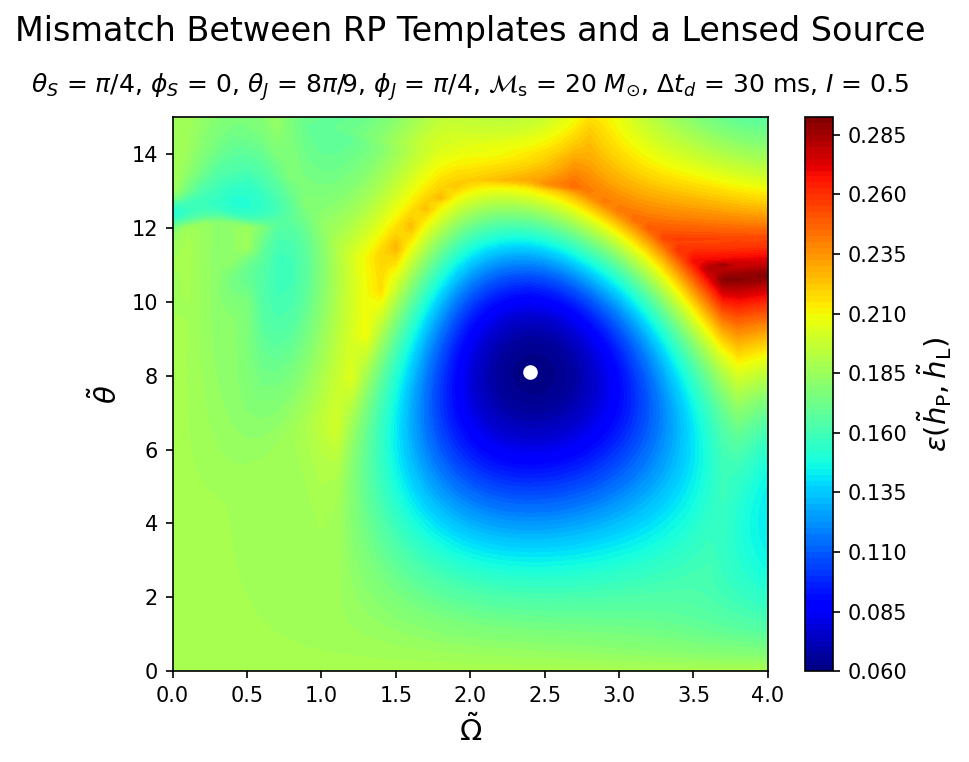

In [92]:
plot_indiv_contour(
    data_mcz20["omega_matrix"],
    data_mcz20["theta_matrix"],
    data_mcz20["epsilon_matrix"],
    data_mcz20["source_params"],
    n_minima=0,
)
# plt.savefig("../figures/contour_mcz20.pdf", bbox_inches="tight")

# make plots for $\mathcal{M_{\rm s}}$ = 40 $M_{\odot}$

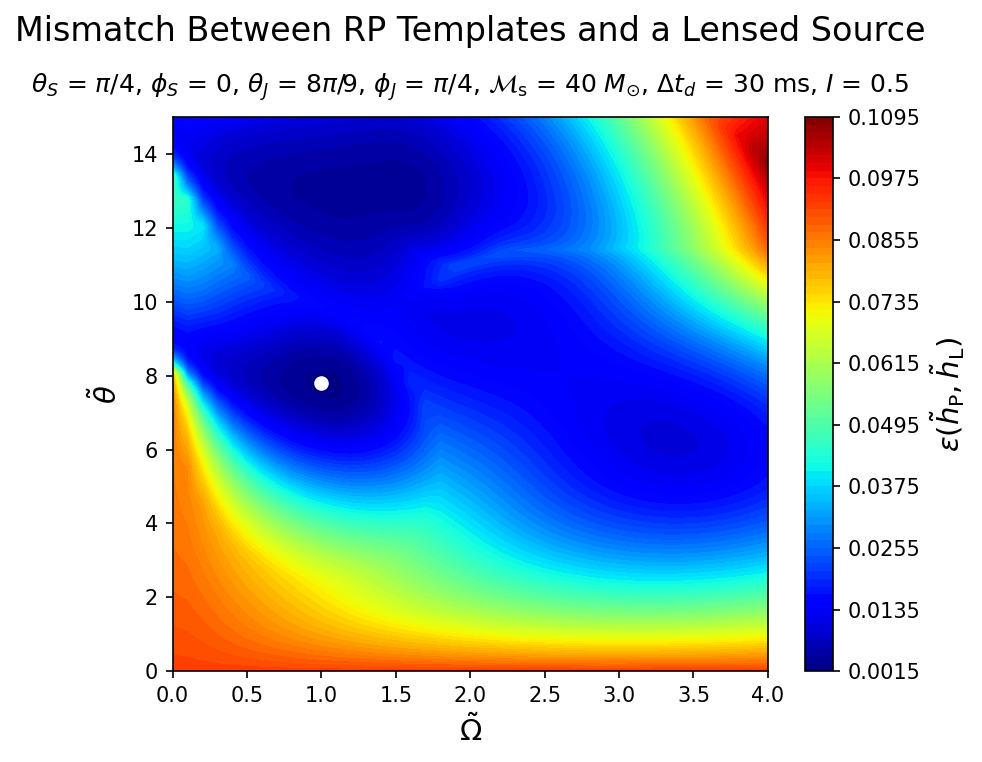

In [94]:
plot_indiv_contour(
    data_mcz40["omega_matrix"],
    data_mcz40["theta_matrix"],
    data_mcz40["epsilon_matrix"],
    data_mcz40["source_params"],
    n_minima=1,
)

for coordinates, z_value in filtered_results:
    plt.plot(coordinates[0], coordinates[1], "o", color="white")

# plt.savefig("../figures/contour_mcz40.pdf", bbox_inches="tight")

# waveform comparison

## define functions

In [6]:
def plot_waveforms(
    t_params: dict,  # template parameters
    s_params: dict,  # source parameters
    axes: matplotlib.axes._axes.Axes,
    phase_shift: float = 0,
    label: str = "template",
    c: str = "k",
    ls: str = "--",
    f_min=20,
    delta_f=0.25,
    psd=None,
    lens_Class=LensingGeo,
    prec_Class=Precessing,
    use_opt_match=True,
    get_updated_mismatch_results=False,
) -> None:

    t_params_copy, s_params_copy = set_to_params(t_params, s_params)

    # get optimized coalescence parameters
    updated_params = find_optimized_coalescence_params(
        t_params_copy,
        s_params_copy,
        f_min,
        delta_f,
        psd,
        lens_Class,
        prec_Class,
        use_opt_match,
        get_updated_mismatch_results,
    )
    s_params_copy = updated_params["updated_s_params"]
    t_params_copy = updated_params["updated_t_params"]
    epsilon = updated_params["updated_mismatch_results"]["mismatch"]
    idx = updated_params["updated_mismatch_results"]["index"]
    phi = updated_params["updated_mismatch_results"]["phi"]

    print(
        f"idx = {idx:.6g}, phi = {phi:.6g}, both should be ~0 if get_updated_mismatch_results is True"
    )  # FOR DEBUGGING

    # source waveform
    s_gw = get_gw(s_params_copy, f_min, delta_f, lens_Class, prec_Class)
    # s_strain = np.abs(s_gw["strain"])
    s_phase = s_gw["phase"]
    lens_inst = lens_Class(s_params_copy)
    td = lens_inst.td()
    I = lens_inst.I()

    # template waveform
    t_gw = get_gw(t_params_copy, f_min, delta_f, lens_Class, prec_Class)
    t_strain = np.abs(t_gw["strain"])
    t_phase = t_gw["phase"]
    axes[0].plot(t_gw["f_array"], t_strain, label=label, c=c, ls=ls)

    # phase difference
    phase_diff = s_phase - t_phase
    phase_diff = np.unwrap(phase_diff + phase_shift)
    axes[1].plot(s_gw["f_array"], phase_diff, label=label, c=c, ls=ls)

    # print out suptitle
    print(
        r"mcz = {:.3g} solar masses, td = {:.3g} ms, I = {:.3g}, omega_tilde = {:.3g}, theta_tilde = {:.3g}, epsilon = {:.3g}".format(
            s_params_copy["mcz"] / solar_mass,
            td * 1e3,
            I,
            t_params_copy["omega_tilde"],
            t_params_copy["theta_tilde"],
            epsilon,
        )
    )


def customize_axes(axes: matplotlib.axes._axes.Axes) -> None:
    # customize strain plot
    axes[0].set_xlabel("f (Hz)", fontsize=24)
    axes[0].set_ylabel(r"$|\~{h}|$", fontsize=24)
    axes[0].tick_params(axis="both", which="major", labelsize=18)
    axes[0].grid()
    axes[0].set_yscale("log")
    axes[0].legend(fontsize=20)

    # customize phase difference plot
    axes[1].set_xlabel("f (Hz)", fontsize=24)
    axes[1].set_ylabel(r"$\Phi_{\rm s} - \Phi_{\rm t}$ (rad)", fontsize=24)
    axes[1].tick_params(axis="both", which="major", labelsize=18)
    axes[1].grid()
    # handles, labels = axes[0].get_legend_handles_labels()
    # axes[1].legend(handles, labels, fontsize=20)

## $\mathcal{M_{\rm s}}$ = 20 $M_{\odot}$

idx = 1.10932e-08, phi = 1.45242e-08, both should be ~0 if get_updated_mismatch_results is True


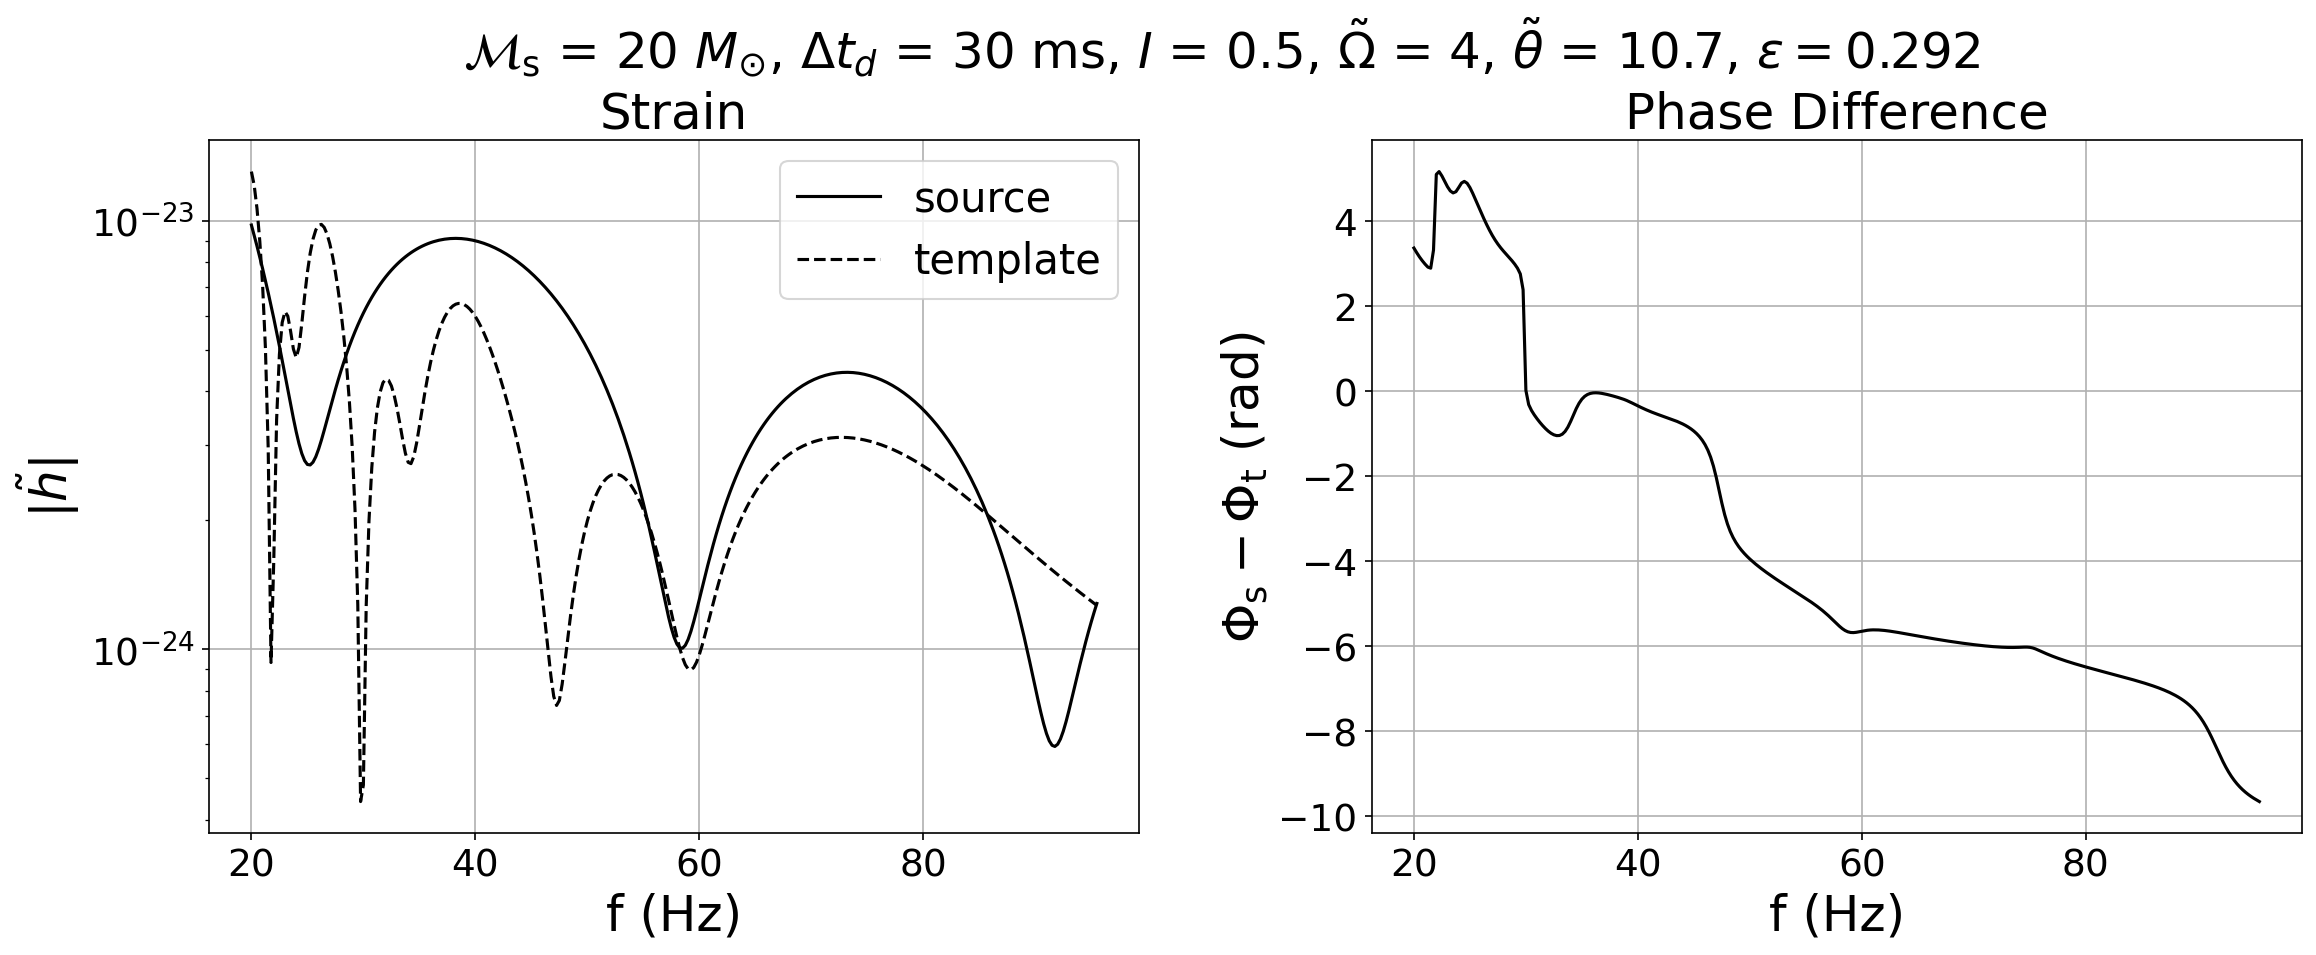

In [4]:
lens_params = data_mcz20["source_params"]
RP_params = data_mcz20["template_params"]
RP_params["omega_tilde"] = data_mcz20["stats"]["ep_max_omega_tilde"]
RP_params["theta_tilde"] = data_mcz20["stats"]["ep_max_theta_tilde"]
RP_params["gamma_P"] = data_mcz20["stats"]["ep_max_gammaP"]

plot_waveform_comparison(RP_params, lens_params, get_updated_mismatch_results=True)
# plt.savefig("../figures/template_mcz20_worst.pdf", bbox_inches="tight")

idx = 1.83577e-09, phi = 2.83451e-09, both should be ~0 if get_updated_mismatch_results is True
mcz = 20 solar masses, td = 30 ms, I = 0.5, omega_tilde = 2.4, theta_tilde = 8.1, epsilon = 0.0604
idx = -3.86779e-09, phi = 4.03235e-08, both should be ~0 if get_updated_mismatch_results is True
mcz = 20 solar masses, td = 30 ms, I = 0.5, omega_tilde = 0, theta_tilde = 0, epsilon = 0.189


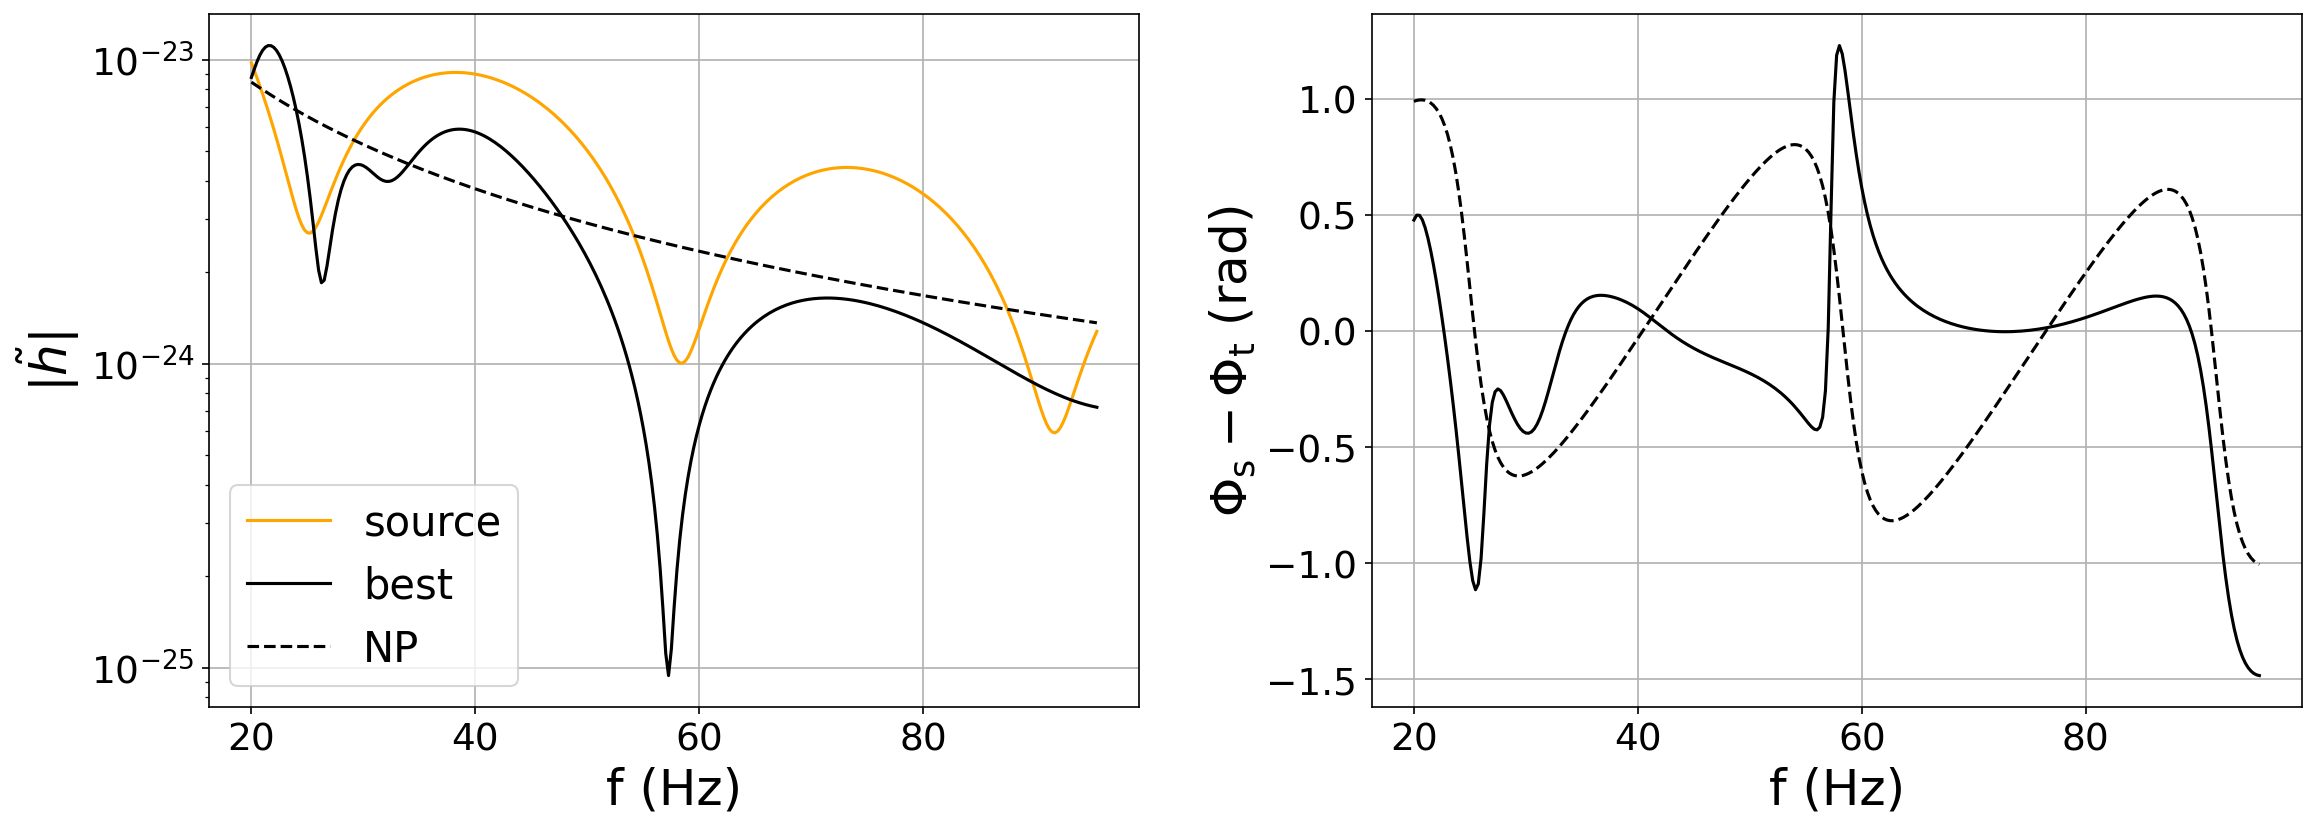

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.subplots_adjust(wspace=0.25)

# plot source waveform
lens_params = data_mcz20["source_params"]
s_gw = get_gw(lens_params)
s_strain = np.abs(s_gw["strain"])
s_farray = s_gw["f_array"]
axes[0].plot(s_farray, s_strain, label="source", c="orange", ls="-")
# axes[1].plot(s_farray, np.zeros_like(s_farray), label="source", color="orange", ls="-")

# plot template waveforms
RP_params = data_mcz20["template_params"]
RP_params["omega_tilde"] = data_mcz20["stats"]["ep_min_omega_tilde"]
RP_params["theta_tilde"] = data_mcz20["stats"]["ep_min_theta_tilde"]
RP_params["gamma_P"] = data_mcz20["stats"]["ep_min_gammaP"]
plot_waveforms(
    RP_params,
    lens_params,
    get_updated_mismatch_results=True,
    axes=axes,
    label="best",
    c="k",
    ls="-",
)

lens_params = data_mcz20["source_params"]
RP_params = data_mcz20["template_params"]
RP_params["omega_tilde"] = 0
RP_params["theta_tilde"] = 0
RP_params["gamma_P"] = 0
plot_waveforms(
    RP_params,
    lens_params,
    get_updated_mismatch_results=True,
    axes=axes,
    label="NP",
    c="k",
    ls="--",
)

customize_axes(axes)

# plt.savefig("../figures/waveforms_mcz20.pdf", bbox_inches="tight")

## $\mathcal{M_{\rm s}}$ = 40 $M_{\odot}$

In [ ]:
for coords, z_value in filtered_results:
    lens_params = data_mcz40["source_params"]
    RP_params = data_mcz40["template_params"]
    RP_params["omega_tilde"] = coords[0]
    RP_params["theta_tilde"] = coords[1]
    RP_params["gamma_P"] = data_mcz40["gammaP_min_matrix"][
        np.where(
            (data_mcz40["omega_matrix"] == coords[0])
            & (data_mcz40["theta_matrix"] == coords[1])
        )
    ]

    plot_waveform_comparison(RP_params, lens_params, get_updated_mismatch_results=True)

idx = 2.9785e-08, phi = -4.91332e-08, both should be ~0 if get_updated_mismatch_results is True


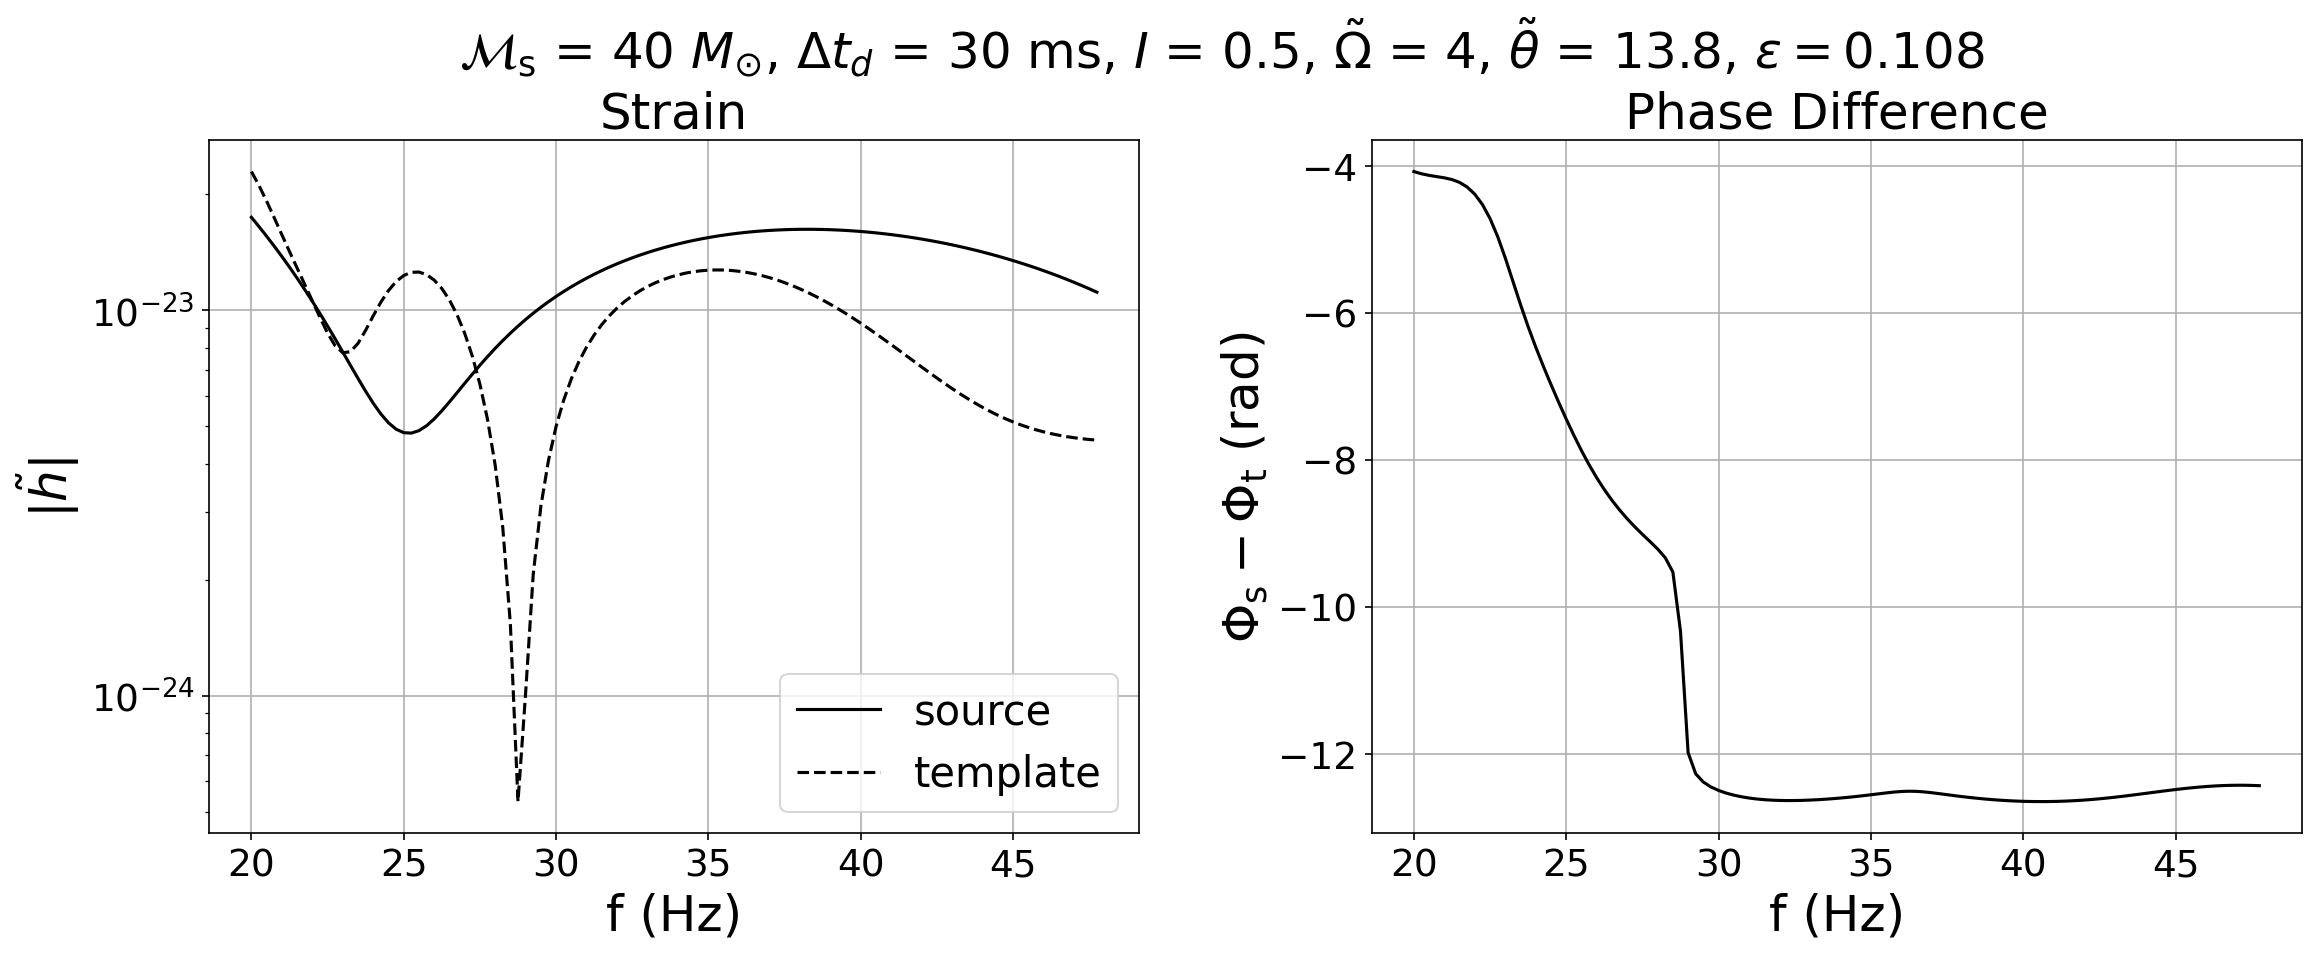

In [5]:
lens_params = data_mcz40["source_params"]
RP_params = data_mcz40["template_params"]
RP_params["omega_tilde"] = data_mcz40["stats"]["ep_max_omega_tilde"]
RP_params["theta_tilde"] = data_mcz40["stats"]["ep_max_theta_tilde"]
RP_params["gamma_P"] = data_mcz40["stats"]["ep_max_gammaP"]

plot_waveform_comparison(RP_params, lens_params, get_updated_mismatch_results=True)
# plt.savefig("../figures/template_mcz40_worst.pdf", bbox_inches="tight")

idx = 2.72545e-08, phi = -2.41681e-08, both should be ~0 if get_updated_mismatch_results is True
mcz = 40 solar masses, td = 30 ms, I = 0.5, omega_tilde = 1, theta_tilde = 7.8, epsilon = 0.00237
idx = -1.39888e-08, phi = 3.64494e-08, both should be ~0 if get_updated_mismatch_results is True
mcz = 40 solar masses, td = 30 ms, I = 0.5, omega_tilde = 1.5, theta_tilde = 13.1, epsilon = 0.00372
idx = 1.18972e-08, phi = 3.28421e-08, both should be ~0 if get_updated_mismatch_results is True
mcz = 40 solar masses, td = 30 ms, I = 0.5, omega_tilde = 0, theta_tilde = 0, epsilon = 0.0925


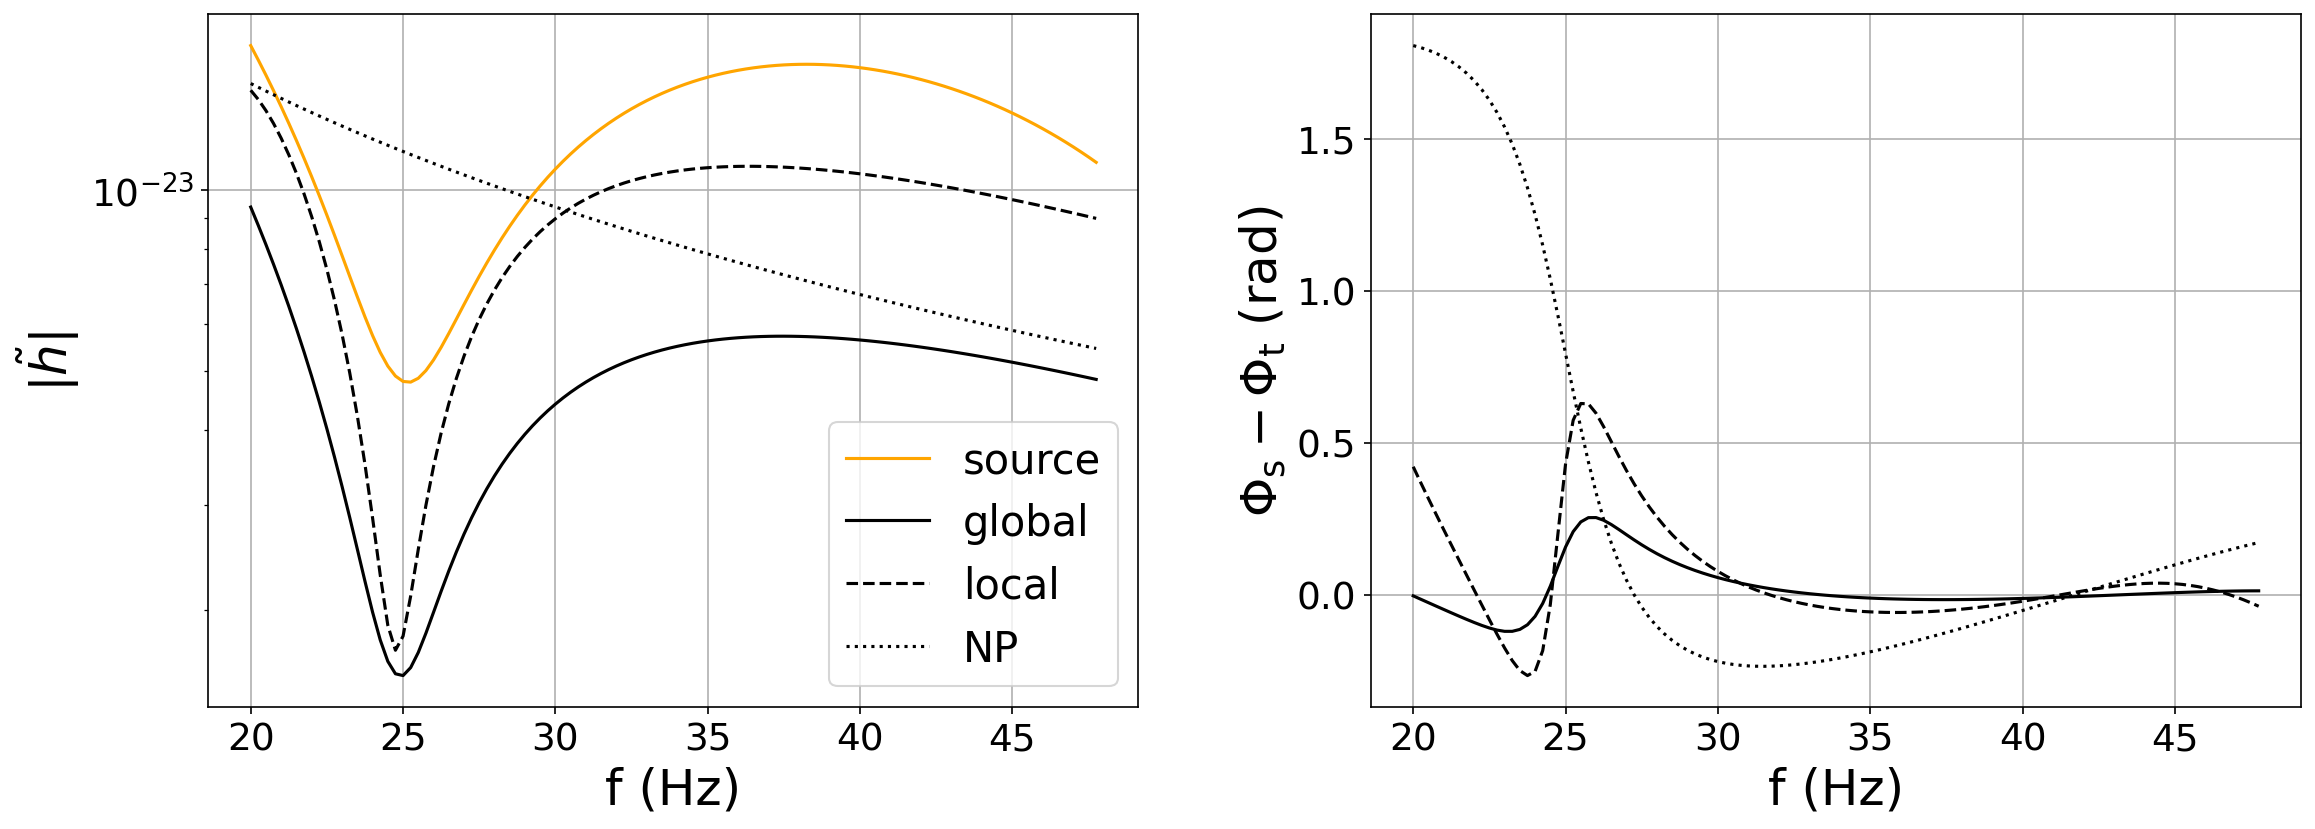

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.subplots_adjust(wspace=0.25)

# plot source waveform
lens_params = data_mcz40["source_params"]
s_gw = get_gw(lens_params)
s_strain = np.abs(s_gw["strain"])
s_farray = s_gw["f_array"]
axes[0].plot(s_farray, s_strain, label="source", c="orange", ls="-")
# axes[1].plot(s_farray, np.zeros_like(s_farray), label="source", color="orange", ls="-")

# plot template waveforms
RP_params = data_mcz40["template_params"]
RP_params["omega_tilde"] = data_mcz40["stats"]["ep_min_omega_tilde"]
RP_params["theta_tilde"] = data_mcz40["stats"]["ep_min_theta_tilde"]
RP_params["gamma_P"] = data_mcz40["stats"]["ep_min_gammaP"]
plot_waveforms(
    RP_params,
    lens_params,
    get_updated_mismatch_results=True,
    axes=axes,
    label="global",
    c="k",
    ls="-",
)

lens_params = data_mcz40["source_params"]
RP_params = data_mcz40["template_params"]
RP_params["omega_tilde"] = 1.5
RP_params["theta_tilde"] = 13.1
RP_params["gamma_P"] = data_mcz40["gammaP_min_matrix"][
    np.where((data_mcz40["omega_matrix"] == 1.5) & (data_mcz40["theta_matrix"] == 13.1))
]
plot_waveforms(
    RP_params,
    lens_params,
    get_updated_mismatch_results=True,
    axes=axes,
    label="local",
    c="k",
    ls="--",
    phase_shift=2 * np.pi,
)

lens_params = data_mcz40["source_params"]
RP_params = data_mcz40["template_params"]
RP_params["omega_tilde"] = 0
RP_params["theta_tilde"] = 0
RP_params["gamma_P"] = 0
plot_waveforms(
    RP_params,
    lens_params,
    get_updated_mismatch_results=True,
    axes=axes,
    label="NP",
    c="k",
    ls=":",
    phase_shift=2 * np.pi,
)

customize_axes(axes)

# plt.savefig("../figures/waveforms_mcz40.pdf", bbox_inches="tight")